In [1]:
import glob
import os
import pathlib
import pandas as pd

In [2]:
print(os.getcwd())

C:\Users\ozkay


In [3]:
os.chdir("C:/Users\ozkay/DATA SCIENCE COURSE/")
energy = pd.read_csv("Value_of_Energy_Cost_dataset.csv")

In [4]:
energy.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

# How many different companies are represented in the data set?

In [5]:
energy['Company Name']

0                                1 State Street
1                                100 Church LLC
2                          100 Wall Investments
3                   1-10 Bush Terminal Owner LP
4      120 Broadway Acquisitions JV, LLC (Ldmk)
                         ...                   
445                           WONTON FOOD, INC.
446                                  Wood Works
447             WorldWide Plumbing Supply, Inc.
448                           WUD Furniture LLC
449                         Wurtec Incorporated
Name: Company Name, Length: 450, dtype: object

# What is the total number of jobs created for businesses in Queens?

In [6]:
queensss = energy[(energy['Borough'] == "Queens")]

In [7]:
queensss.count()

Company Name                                 173
company contact                              173
company email                                169
company phone                                173
Address                                      173
City                                         173
State                                        173
Postcode                                     173
Industry                                     173
Industry descr                               172
Company Type                                 173
Current fulltime                             173
Job created                                    5
Job retain                                     6
Effective Date                               173
Total Savings                                173
Savings from beginning receiving benefits    173
Borough                                      173
Latitude                                     153
Longitude                                    153
Community Board     

# How many different unique email domains names are there in the data set?

In [8]:
energy['domains'] = energy['company email'].str.split('@').str.get(1)

In [9]:
energy['domains_2']= energy['domains'].str.split('.').str.get(1)
energy['domains_2']

0      com
1      NaN
2      NaN
3      com
4      com
      ... 
445    com
446    com
447    com
448    com
449    com
Name: domains_2, Length: 450, dtype: object

In [10]:
energy['domains_2'].unique()

array(['com', nan, 'jll', 'aecom', 'org', 'edu', 'net', 'comP', 'COM',
       'ngrid', 'biz', 'klinelogistics', 'kwe', 'aero', 'info', 'nyc'],
      dtype=object)

In [11]:
energy['domains_2'].nunique()

15

# Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA

In [12]:
os.getcwd()
os.chdir("C:/Users/ozkay/DATA SCIENCE COURSE/")

In [13]:
en = pd.read_csv("Value_of_Energy_Cost_dataset.csv")

In [14]:
en['freq'] = en.groupby('NTA')['NTA'].transform('count')
en[['freq', 'NTA']]                        

,freq,NTA
0,3.0,Midwood
1,5.0,SoHo-TriBeCa-Civic Center-Little Italy
2,9.0,Battery Park City-Lower Manhattan
3,48.0,Sunset Park West
4,9.0,Battery Park City-Lower Manhattan
...,...,...
445,10.0,Bushwick South
446,10.0,Bushwick South
447,3.0,Mariner's Harbor-Arlington-Port Ivory-Granitev...
448,9.0,Crown Heights North


In [29]:
above_5 = (en[en['freq'] >= 5.0])

In [30]:
en['Total Savings'].head()

0         0.00
1    136578.20
2    302959.40
3      2159.67
4    922407.32
Name: Total Savings, dtype: float64

In [31]:
en['Job created'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Job created, dtype: float64

In [50]:
en['Total Savings'] = en['Total Savings'].astype(float)

In [51]:
average_total_savings= above_5.groupby(['NTA'])['Total Savings'].mean()

In [52]:
dict(average_total_savings)
en['average'] = en.NTA.map(dict(average_total_savings))

In [53]:
en['average'] = en.NTA.map(dict(average_total_savings))

In [54]:
total_jobs_created = above_5.groupby(['NTA'])['Job created'].sum()
dict(total_jobs_created)
en['tot_jobs'] = en.NTA.map(dict(total_jobs_created))

In [37]:
csv_en = en.to_csv('en.csv', index = False)
print('\DATA SCIENCE COURSE', csv_en)

\DATA SCIENCE COURSE None


# create a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

In [1]:
import glob
import os
import pathlib
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.getcwd()
os.chdir("C:/Users/ozkay/DATA SCIENCE COURSE/")
en = pd.read_csv('en.csv')

In [3]:
en.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA', 'freq', 'tot_jobs', 'average'],
      dtype='object')

In [4]:
en['average']

0                NaN
1       37214.024000
2      469890.796667
3       14316.976875
4      469890.796667
           ...      
445     26140.455000
446     26140.455000
447              NaN
448      4036.298889
449              NaN
Name: average, Length: 450, dtype: float64

In [5]:
en['tot_jobs']

0       NaN
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
445    10.0
446    10.0
447     NaN
448     0.0
449     NaN
Name: tot_jobs, Length: 450, dtype: float64

Text(0, 0.5, 'average_total_savings')

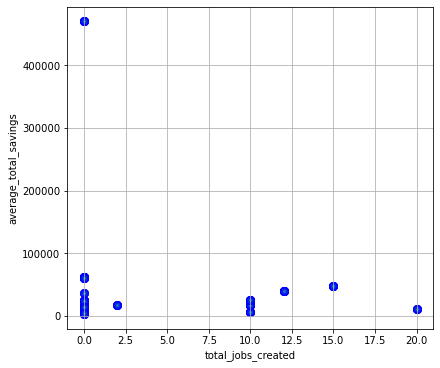

In [6]:
x = en['tot_jobs']
y = en['average']
fig, ax = plt.subplots(figsize=(6, 5), layout='constrained')
plt.scatter(x,y, edgecolor='blue', linewidth=3, alpha=0.50)
plt.xscale=('linear')
plt.yscale=('linear')
plt.grid(True)
ax.set_xlabel('total_jobs_created')
ax.set_ylabel('average_total_savings')

Text(0, 0.5, 'average_total_savings')

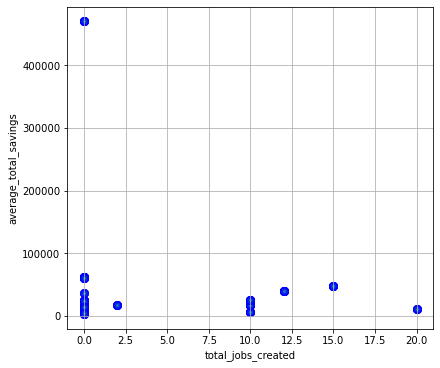

In [7]:
x = en['tot_jobs']
y = en['average']
fig, ax = plt.subplots(figsize=(6, 5), layout='constrained')
plt.scatter(x,y, edgecolor='blue', linewidth=3, alpha=0.50)
plt.xscale=('log')
plt.yscale=('log')
plt.grid(True)
ax.set_xlabel('total_jobs_created')
ax.set_ylabel('average_total_savings')

# histogram of the log of the average total savings.

In [10]:
en['average'] = en['average'].astype(float)
x = np.array(en['average'])

In [57]:
en.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA', 'freq', 'tot_jobs', 'average', 'Date'],
      dtype='object')

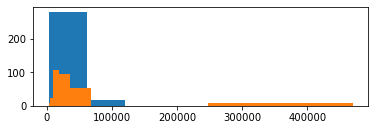

In [15]:
plt.subplot(211)
hist, bins, _ = plt.hist(x, bins=8)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(x, bins=logbins)
plt.show()

# line plot of the total jobs created for each month.


In [60]:
en['Effective Date'] = np.array(en['Effective Date'])

(array([12784., 12965., 13149., 13330., 13514., 13695., 13879., 14061.,
        14245.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

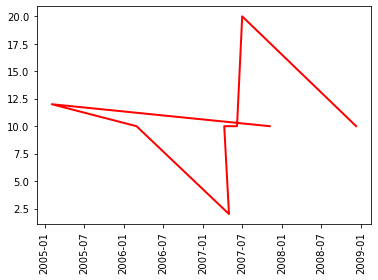

In [64]:
plot_en = en.dropna()
plt.plot(plot_en['Effective Date'], plot_en['tot_jobs'],color='r', linewidth=2.0)
plt.xticks(rotation='vertical')